In [1]:
from os.path import join as pjoin
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns # seaborn is only used for its plotting layout configuration
%matplotlib inline
import openbenchmarking as openbm

If you are new to Python or to some of the packages that are being imported below: they are part of the standard stack often used in data science and science/engineering environments. Some of these dependencies are Python packages with compiled extensions, but there are Python distributions with binary packages availble which make installing SciPy stack a breeze. Alternatively, Linux distributions contain usually (most) of these dependencies.
* [SciPy Stack](http://scipy.org/)
* [Various installation procedures](http://scipy.org/install.html)

Dependencies:
* lxml, numpy, pandas, matplotlib, seaborn (optionall), openpyxl (optionally, for saving DataFrame to Excel sheet)

The plots layout is quite basic for this example. With a few more tweaks anything is possibile thanks to the extensibility of the underlying plotting library Matplotlib.

Other advantage of using Python: availability of interactive HTML5 plotting tools, such as:
* [Matplotlib + D3](http://mpld3.github.io/)
* [plotly](https://plot.ly/python/)
* [bokeh](http://bokeh.pydata.org/en/latest/)
* [holoviews](http://holoviews.org/)
* [pygal](http://www.pygal.org/en/stable/)

I have not used these packages yet, so an example with interactive plot might come at some other point.

In [4]:
xml = openbm.xml2df()
search_string = 'RX 470'

In [ ]:
# this might take a minute...
df = openbm.download_from_openbm(search_string)

# for this example we'll just save the DataFramee in a text based csv file
df.to_csv('search_{}.csv'.format(search_string))

# hdf5 is a fast storage format that can handle very large data sets
#df.to_hdf('search_{}.h5'.format(search_string), 'table')
#df.to_excel('search_{}.xlsx'.format(search_string))

First we will use the search function on the OpenBenchMarking.org webpage. The ```download_from_openbm``` simply gets all the test id's from the search result as you can find here: [http://openbenchmarking.org/s/RX%20470&show_more](http://openbenchmarking.org/s/RX%20470&show_more), and downloads all the XML result files, converts them into a ```pands.DataFrame```, and merges them into one big table.

In [5]:
# load previously donwload data
df = pd.read_csv('search_{}.csv'.format(search_string))
# optionally, in either Excel or hdf5 format this would be:
#df = pd.read_hdf('search_{}.h5'.format(search_string), 'table')
#df = pd.read_excel('search_{}.xlsx'.format(search_string))

df.drop(xml.user_cols, inplace=True, axis=1)
df.drop_duplicates(inplace=True)

# only R470 graphic cards
res_find = df['Graphics'].str.lower().str.find('rx 470')
# grp_lwr holds -1 for entries that do not contain the search string
# we are only interested in taking the indeces of those entries that do
# contain our search term, so antyhing above -1
df_find = df.loc[(res_find > -1).values]

In [6]:
# now see for which tests we have sufficient data
openbm.explore_dataset(df_find, 'ResultIdentifier', 'ResultDescription', 'Processor')

  134 : None
   13 : pts/bioshock-infinite-1.0.1
    3 : pts/c-ray-1.1.0
    1 : pts/compress-7zip-1.6.2
   23 : pts/csgo-1.4.1
   12 : pts/deus-exmd-1.0.1
   63 : pts/dota2-1.2.1
   10 : pts/etlegacy-1.0.0
    2 : pts/financebench-1.0.0
   60 : pts/gputest-1.3.1
    2 : pts/iozone-1.8.0
    8 : pts/lightsmark-1.2.0
    4 : pts/luxmark-1.1.0
    6 : pts/metroll-redux-1.1.1
    9 : pts/metroll-redux-1.2.0
    5 : pts/mixbench-1.0.0
    1 : pts/nexuiz-1.6.1
   26 : pts/openarena-1.5.3
   10 : pts/ramspeed-1.4.0
   17 : pts/shoc-1.0.1
    1 : pts/supertuxkart-1.3.0
    1 : pts/talos-principle-1.1.1
   37 : pts/tesseract-1.1.0
   20 : pts/unigine-heaven-1.6.2
   28 : pts/unigine-valley-1.1.4
   40 : pts/xonotic-1.4.0
    6 : system/darktable-1.0.0

    1 : pts/talos-principle-1.1.1
            1 : Renderer: OpenGL - Resolution: 1920 x 1080
                    1 :  Intel Xeon E3-1280 v5 @ 4.00GHz (8 Cores)

    1 : pts/compress-7zip-1.6.2
            1 : Compress Speed Test
                

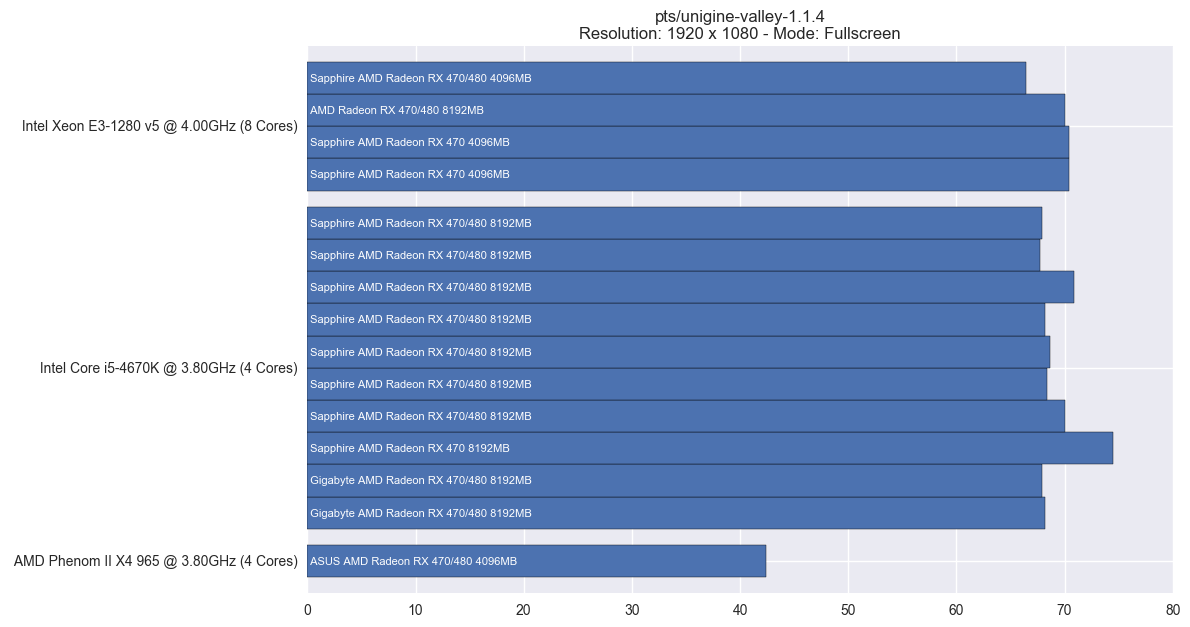

In [7]:
test = 'pts/unigine-valley-1.1.4'
test_detail = 'Resolution: 1920 x 1080 - Mode: Fullscreen'

# select only a certain test
sel = df_find[df_find['ResultIdentifier'] == test]
# and the same version/resultion of said test
sel = sel[sel['ResultDescription']==test_detail].copy()
# cast Value to a float64
sel['Value'] = sel['Value'].astype(np.float64)
# remove close to zero measurements
#sel = sel[(sel['Display Driver']!='None') & (sel['Value']>0.5)]
fig, ax = openbm.plot_barh_groups(sel, 'Graphics', 'Processor', label_xval='Value')
ax.set_title(test + '\n' + test_detail)

We can also inspect the DataFrame directly to see all the available details of the corresponding tests

In [8]:
sel

,Unnamed: 0,Audio,Chipset,Compiler,Desktop,Disk,Display Driver,Display Server,File-System,Graphics,...,Arguments,ResultDescription,DisplayFormat,ResultIdentifier,DataEntryJSON,Proportion,RawString,Scale,ResultTitle,Value
249,249,Realtek ALC1150,Intel Sky Lake,GCC 5.4.0 20160609,Unity 7.4.0,4 x 120GB TOSHIBA-TR150 + Samsung SSD 950 PRO...,None,X Server 1.18.3,ext4,Sapphire AMD Radeon RX 470 4096MB,...,-video_width 1920 -video_height 1080 -video_fu...,Resolution: 1920 x 1080 - Mode: Fullscreen,BAR_GRAPH,pts/unigine-valley-1.1.4,None,HIB,70.5185:70.3663:70.4505,Frames Per Second,Unigine Valley,70.45
1105,2136,Realtek ALC1150,Intel Sky Lake,GCC 5.4.0 20160609,Unity 7.4.0,2 x 120GB TOSHIBA-TR150 + Samsung SSD 950 PRO...,None,X Server 1.18.3,ext4,Sapphire AMD Radeon RX 470 4096MB,...,-video_width 1920 -video_height 1080 -video_fu...,Resolution: 1920 x 1080 - Mode: Fullscreen,BAR_GRAPH,pts/unigine-valley-1.1.4,None,HIB,70.5185:70.3663:70.4505,Frames Per Second,Unigine Valley,70.45
1372,2854,Realtek ALC892,AMD RD9x0/RX980,GCC 6.2.1 20160916,GNOME Shell 3.20.4,2000GB TOSHIBA HDWD120 + 500GB Western Digita...,radeon 7.6.99,None,ext4,ASUS AMD Radeon RX 470/480 4096MB,...,-video_width 1920 -video_height 1080 -video_fu...,Resolution: 1920 x 1080 - Mode: Fullscreen,BAR_GRAPH,pts/unigine-valley-1.1.4,None,HIB,42.1378:42.5005:42.5592,Frames Per Second,Unigine Valley,42.40
1540,3057,Realtek ALC1150,Intel Sky Lake,GCC 5.4.0 20160609 + LLVM 3.8.0,Unity 7.4.0,525GB Crucial_CT525MX3 + 256GB INTEL SSDPEKKW...,amdgpu 1.1.99,X Server 1.18.4,ext4,AMD Radeon RX 470/480 8192MB,...,-video_width 1920 -video_height 1080 -video_fu...,Resolution: 1920 x 1080 - Mode: Fullscreen,BAR_GRAPH,pts/unigine-valley-1.1.4,None,HIB,70.1291:70.1233:69.9264,Frames Per Second,Unigine Valley,70.06
1592,3109,Realtek ALC1150,Intel Sky Lake,GCC 5.4.0 20160609 + LLVM 3.8.0,Unity 7.4.0,525GB Crucial_CT525MX3 + 256GB INTEL SSDPEKKW...,modesetting 1.18.4,X Server 1.18.4,ext4,Sapphire AMD Radeon RX 470/480 4096MB,...,-video_width 1920 -video_height 1080 -video_fu...,Resolution: 1920 x 1080 - Mode: Fullscreen,BAR_GRAPH,pts/unigine-valley-1.1.4,None,HIB,66.5875:66.276:66.3119,Frames Per Second,Unigine Valley,66.39
2433,5864,Realtek ALC898,Intel 4th Gen Core DRAM,GCC 6.2.0 20161005,Unity 7.5.0,500GB Crucial_CT500MX2,modesetting 1.18.4,X Server 1.18.4,ext4,Gigabyte AMD Radeon RX 470/480 8192MB,...,-video_width 1920 -video_height 1080 -video_fu...,Resolution: 1920 x 1080 - Mode: Fullscreen,BAR_GRAPH,pts/unigine-valley-1.1.4,None,HIB,68.3098:68.028:68.1125,Frames Per Second,Unigine Valley,68.15
2438,5869,Realtek ALC898,Intel 4th Gen Core DRAM,GCC 6.2.0 20161005,Unity 7.5.0,500GB Crucial_CT500MX2,modesetting 1.18.4,X Server 1.18.4,ext4,Gigabyte AMD Radeon RX 470/480 8192MB,...,-video_width 1920 -video_height 1080 -video_fu...,Resolution: 1920 x 1080 - Mode: Fullscreen,BAR_GRAPH,pts/unigine-valley-1.1.4,None,HIB,67.9355:67.729:67.9844,Frames Per Second,Unigine Valley,67.88
2969,7355,Realtek ALC892,Intel 4th Gen Core DRAM,GCC 6.2.1 20160830 + LLVM 4.0.0svn,Openbox 3.6.1,256GB Crucial_CT256MX1 + 3001GB Western Digit...,None,None,xfs,Sapphire AMD Radeon RX 470 8192MB,...,-video_width 1920 -video_height 1080 -video_fu...,Resolution: 1920 x 1080 - Mode: Fullscreen,BAR_GRAPH,pts/unigine-valley-1.1.4,None,HIB,74.2047:74.645:74.6515,Frames Per Second,Unigine Valley,74.50
2981,7367,Realtek ALC892,Intel 4th Gen Core DRAM,GCC 6.2.1 20160830 + LLVM 4.0.0svn,GNOME Shell 3.22.2,256GB Crucial_CT256MX1 + 3001GB Western Digit...,None,None,xfs,Sapphire AMD Radeon RX 470/480 8192MB,...,-video_width 1920 -video_height 1080 -video_fu...,Resolution: 1920 x 1080 - Mode: Fullscreen,BAR_GRAPH,pts/unigine-valley-1.1.4,None,HIB,69.5248:70.2205:70.2645,Frames Per Second,Unigine Valley,70.00
2993,7379,Realtek ALC892,Intel 4th Gen Core DRAM,GCC 6.2.1 20160830 + LLVM 4.0.0svn,GNOME Shell 3.22.2,256GB Crucial_CT256MX1 + 3001GB Western Digit...,None,None,xfs,Sapphire AMD Radeon RX 470/480 8192MB,...,-video_width 1920 -vid

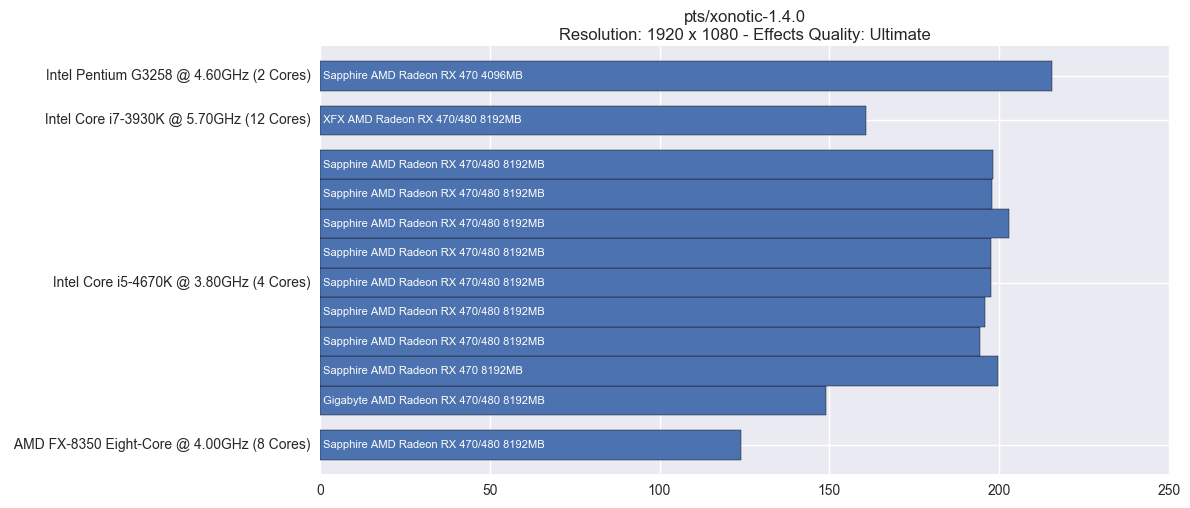

In [10]:
test = 'pts/xonotic-1.4.0'
test_detail = 'Resolution: 1920 x 1080 - Effects Quality: Ultimate'

# select only a certain test
sel = df_find[df_find['ResultIdentifier'] == test]
# and the same version/resultion of said test
sel = sel[sel['ResultDescription']==test_detail].copy()
# cast Value to a float64
sel['Value'] = sel['Value'].astype(np.float64)
# remove close to zero measurements
#sel = sel[(sel['Display Driver']!='None') & (sel['Value']>0.5)]
fig, ax = openbm.plot_barh_groups(sel, 'Graphics', 'Processor', label_xval='Value')
ax.set_title(test + '\n' + test_detail)

Or show only the Processor and Graphics columns (not truncated):

In [9]:
print(sel[['Processor', 'Graphics']])

                                       Processor  \
249    Intel Xeon E3-1280 v5 @ 4.00GHz (8 Cores)   
1105   Intel Xeon E3-1280 v5 @ 4.00GHz (8 Cores)   
1372    AMD Phenom II X4 965 @ 3.80GHz (4 Cores)   
1540   Intel Xeon E3-1280 v5 @ 4.00GHz (8 Cores)   
1592   Intel Xeon E3-1280 v5 @ 4.00GHz (8 Cores)   
2433     Intel Core i5-4670K @ 3.80GHz (4 Cores)   
2438     Intel Core i5-4670K @ 3.80GHz (4 Cores)   
2969     Intel Core i5-4670K @ 3.80GHz (4 Cores)   
2981     Intel Core i5-4670K @ 3.80GHz (4 Cores)   
2993     Intel Core i5-4670K @ 3.80GHz (4 Cores)   
3007     Intel Core i5-4670K @ 3.80GHz (4 Cores)   
3019     Intel Core i5-4670K @ 3.80GHz (4 Cores)   
3031     Intel Core i5-4670K @ 3.80GHz (4 Cores)   
3043     Intel Core i5-4670K @ 3.80GHz (4 Cores)   
3055     Intel Core i5-4670K @ 3.80GHz (4 Cores)   

                                    Graphics  
249        Sapphire AMD Radeon RX 470 4096MB  
1105       Sapphire AMD Radeon RX 470 4096MB  
1372       ASUS AMD Radeon

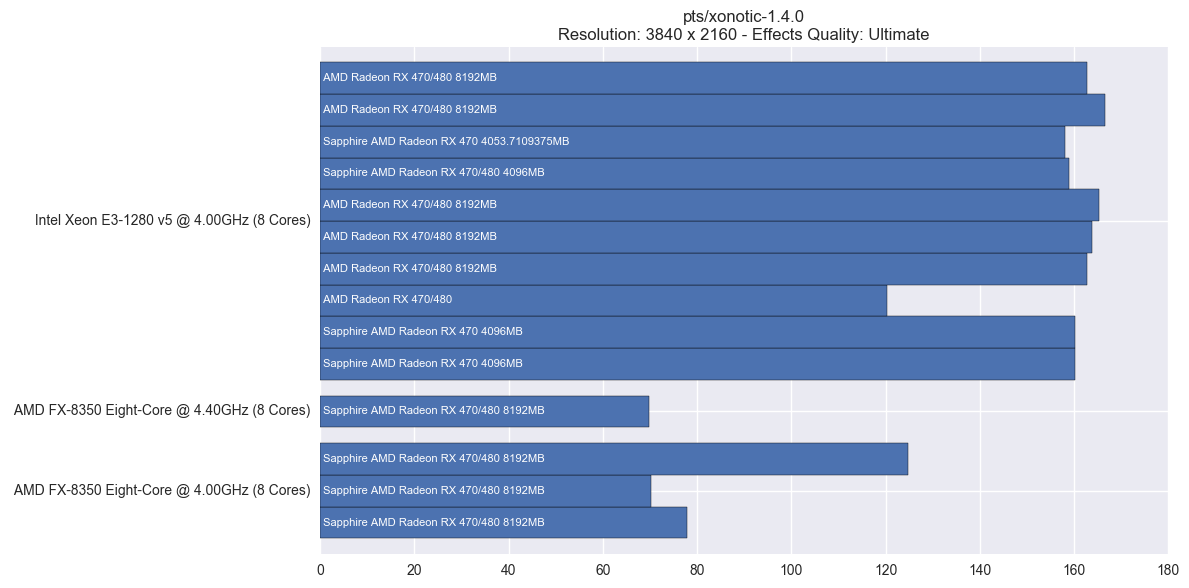

In [11]:
test = 'pts/xonotic-1.4.0'
test_detail = 'Resolution: 3840 x 2160 - Effects Quality: Ultimate'

# select only a certain test
sel = df_find[df_find['ResultIdentifier'] == test]
# and the same version/resultion of said test
sel = sel[sel['ResultDescription']==test_detail].copy()
# cast Value to a float64
sel['Value'] = sel['Value'].astype(np.float64)
# remove close to zero measurements
#sel = sel[(sel['Display Driver']!='None') & (sel['Value']>0.5)]
fig, ax = openbm.plot_barh_groups(sel, 'Graphics', 'Processor', label_xval='Value')
ax.set_title(test + '\n' + test_detail)